# A Peek at Ordinary Differential Equations

This notebook is intended to show how to solve basic ODE problems in python. Disclosure: I'm still learning this as well so I can't really give you more details about this.

The examples below are directly lifted from this website: [link here](https://pundit.pratt.duke.edu/wiki/Python:Ordinary_Differential_Equations/Examples)

## Constant Rate of Change

$$\frac{dy}{dt}=C, \text{for some constant }C$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# define function for describing the derivative
def f(t, y, c):
    dydt = [c[0]]
    return dydt

# define timespans
tspan = np.linspace(0, 10, 100) # generate 100 evenly spaced points between 0 and 10

# define initial values and constants
# in research, these values are often based on established values, or from other relevant papers
yinit = [6]
c = [1.2]

# solve differential equation
def func(t, y): return f(t, y, c)

sol = solve_ivp(func, [tspan[0], tspan[-1]], yinit, t_eval=tspan, rtol=1e-5)

In [3]:
sol.y.shape

(1, 100)

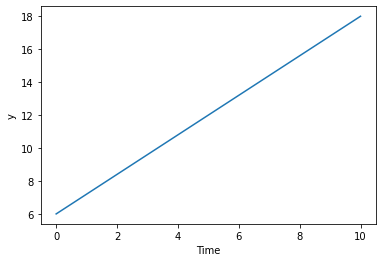

In [4]:
# plot y(t)
plt.plot(sol.t, sol.y[0])
plt.xlabel('Time')
plt.ylabel('y');

### Time-dependent Rate of Change

Example:
$$\frac{dy}{dt}=\alpha t^2 + \beta t + \gamma$$

In [5]:
# define function for describing the derivative
def f(t, y, c):
    dydt = np.polyval(c, t)
    return dydt

# define timespans
tspan = np.linspace(0, 4, 20) # generate 20 evenly spaced points between 0 and 4

# define initial values and constants
# in research, these values are often based on established values, or from other relevant papers
yinit = [6]
c = [2, -6, 3]

# solve differential equation
def func(t, y): return f(t, y, c)

sol = solve_ivp(func, [tspan[0], tspan[-1]], yinit, t_eval=tspan, rtol=1e-5)

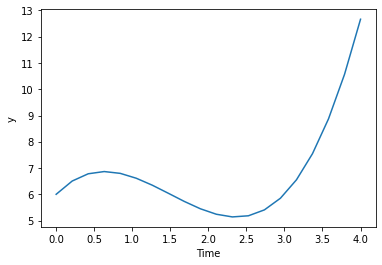

In [6]:
# plot y(t)
plt.plot(sol.t, sol.y[0])
plt.xlabel('Time')
plt.ylabel('y');

### Population Growth

$$\frac{dy}{dt}=C \cdot y$$

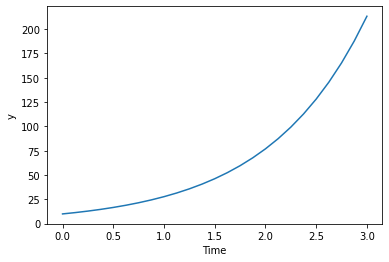

In [7]:
# define function for describing the derivative
def f(t, y, c):
    dydt = [c[0] * y[0]]
    return dydt

# define timespans
tspan = np.linspace(0, 3, 25)

# define initial values and constants
# in research, these values are often based on established values, or from other relevant papers
yinit = [10]
c = [1.02]

# solve differential equation
def func(t, y): return f(t, y, c)

sol = solve_ivp(func, [tspan[0], tspan[-1]], yinit, t_eval=tspan, rtol=1e-5)

# plot y(t)
plt.plot(sol.t, sol.y[0])
plt.xlabel('Time')
plt.ylabel('y');

### Multiple Variable Models

$$\frac{dy_{0}}{dt} = \alpha \cos{\beta t}, \frac{dy_{1}}{dt} = \gamma y_{0} + \delta t$$

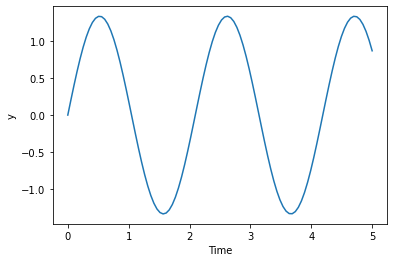

In [8]:
# define function for describing the derivative
def f(t, y, c):
    # write equations inside a list
    dydt = [c[0]*np.cos(c[1]*t), c[2]*y[0] + c[3]*t]
    return dydt

# define timespans
tspan = np.linspace(0, 5, 100)

# define initial values and constants
# in research, these values are often based on established values, or from other relevant papers
yinit = [0, -3]
c = [4, 3, -2, .5]

# solve differential equation
def func(t, y): return f(t, y, c)

sol = solve_ivp(func, [tspan[0], tspan[-1]], yinit, t_eval=tspan, rtol=1e-5)

# plot y(t)
plt.plot(sol.t, sol.y[0])
plt.xlabel('Time')
plt.ylabel('y');

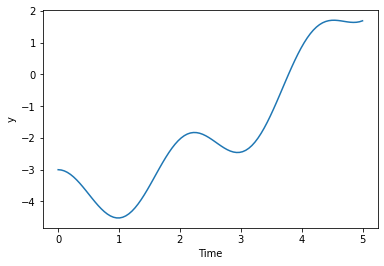

In [9]:
# plot y(t)
plt.plot(sol.t, sol.y[1])
plt.xlabel('Time')
plt.ylabel('y');

### Higher Order Differential Equations

Example - Constant Jerk
$$j = \frac{d^3y}{dt^3} = C$$

First, write three first-order differential equations to represent the third-order equation:

$$y_{0} = y$$

$$\frac{dy_{0}}{dt} = \frac{dy}{dt} = y_{1}$$

$$\frac{dy_{1}}{dt} = \frac{d^{2}y}{dt^2} = y_{2}$$

$$\frac{dy_{2}}{dt} = \frac{d^{3}y}{dt^3} = j = C$$

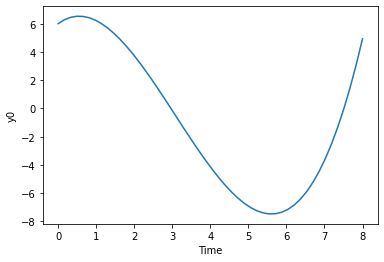

In [10]:
# define function for describing the derivative
def f(t, y, c):
    # write equations inside a list
    dydt = [y[1], y[2], c[0]]
    return dydt

# define timespans
tspan = np.linspace(0, 8, 50)

# define initial values and constants
# in research, these values are often based on established values, or from other relevant papers
yinit = [6, 2, -4]
c = [1.3]

# solve differential equation
def func(t, y): return f(t, y, c)

sol = solve_ivp(func, [tspan[0], tspan[-1]], yinit, t_eval=tspan, rtol=1e-5)

# plot y0
plt.plot(sol.t, sol.y[0])
plt.xlabel('Time')
plt.ylabel('y0');

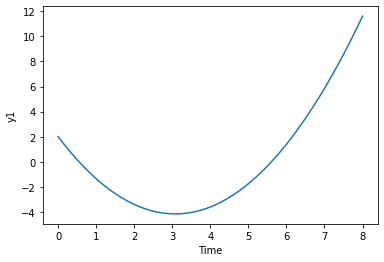

In [11]:
# plot y1
plt.plot(sol.t, sol.y[1])
plt.xlabel('Time')
plt.ylabel('y1');

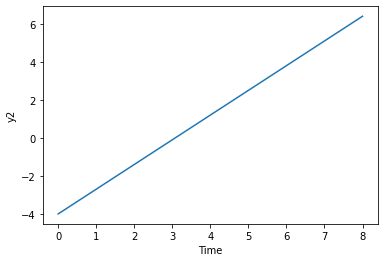

In [12]:
# plot y2
plt.plot(sol.t, sol.y[2])
plt.xlabel('Time')
plt.ylabel('y2');

## A Completed Work on Simulating Blood Glucose Control using ODEs

Here's a [link](https://jckantor.github.io/CBE30338/B.01-Diabetes-Controlling-Blood-Glucose-Concentrations.html) to a sample work on ODEs for simulating blood glucose control